# CREDIT SCORING MODEL

## Data Reading & Understanding

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [2]:
pd.set_option("display.max_columns",40)
pd.set_option("display.max_rows",30)

In [174]:
credit_df = pd.read_csv('train.csv')
credit_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
credit_df.shape

(100000, 28)

In [5]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [6]:
credit_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [7]:
# statistical info about categorical features only 
credit_df.describe(include=object).T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


In [175]:
df = credit_df.copy()

## Data Preparation & Cleaning

In [176]:
## Dropping unnecessary Columns
credit_df = credit_df.drop(['ID','Name','SSN'],axis=1)
credit_df.shape

(100000, 25)

In [10]:
credit_df.isnull().sum()

Customer_ID                     0
Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [177]:
# Clear strange values apart from the NaN Values
def text_cleaning(data):
    if data is np.NaN or not isinstance(data, str): # isinstance(data, str) checks if data is string or not
        return data
    else:
        return str(data).strip("_ ,")

In [178]:
credit_df = credit_df.applymap(text_cleaning)
credit_df = credit_df.replace(["", "nan", "!@9#%8"],np.NaN)
# "!@9#%8" was in payment behiaviour column

In [179]:
credit_df['Month'] = pd.to_datetime(credit_df['Month'],format="%B").dt.month

In [180]:
lst1 = ["Age", "Annual_Income", "Num_of_Loan", "Num_of_Delayed_Payment",
        "Changed_Credit_Limit", "Outstanding_Debt", "Amount_invested_monthly",
        "Monthly_Balance"]
for i in lst1:
    credit_df[i] = credit_df[i].astype(float)

In [181]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  int32  
 2   Age                       100000 non-null  float64
 3   Occupation                92938 non-null   object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     84998 non-null   float64
 6   Num_Bank_Accounts         100000 non-null  int64  
 7   Num_Credit_Card           100000 non-null  int64  
 8   Interest_Rate             100000 non-null  int64  
 9   Num_of_Loan               100000 non-null  float64
 10  Type_of_Loan              88592 non-null   object 
 11  Delay_from_due_date       100000 non-null  int64  
 12  Num_of_Delayed_Payment    92998 non-null   float64
 13  Changed_Credit_Limit      97909 non-null   fl

In [16]:
# Each Customer_ID is of the form 'CUS_0xd40' >> x[4]: 0xd40 (A hexadecimal number) which is then
# converted to interger using base 16.
credit_df["Customer_ID"] = credit_df.Customer_ID.apply(lambda x: int(x[4:], 16))

#### Credit Histroy Age

In [182]:
# Credit_History_Age has values like this >> 22 Years and 1 Months
def month_convertor(x):
    if pd.notnull(x): # check if the value is not null then only do these
        num1 = int(x.split(" ")[0]) # extract 22 (years)
        num2 = int(x.split(" ")[3]) # extract 1 (months)
        return (num1 * 12) + num2   # final convert everything in months.
    else:
        return x # if the value is null return null

In [183]:
credit_df["Credit_History_Age"] = credit_df["Credit_History_Age"].apply(month_convertor)

#### Reassign Group Mode Values to null values and EDA

In [184]:
# for column with data type "object".
def group_mode(dataframe, group_by, column):
    mode_by_group = dataframe.groupby(group_by)[column].transform(lambda x : x.mode()[0] if not x.mode().empty else np.NaN)
    result = dataframe[column].fillna(mode_by_group)
    return result

##### Occupation

In [185]:
credit_df.groupby('Customer_ID')['Occupation'].apply(list)

Customer_ID
CUS_0x1000    [Lawyer, Lawyer, Lawyer, Lawyer, Lawyer, Lawye...
CUS_0x1009    [Mechanic, Mechanic, Mechanic, Mechanic, Mecha...
CUS_0x100b    [Media_Manager, Media_Manager, Media_Manager, ...
CUS_0x1011    [Doctor, Doctor, Doctor, Doctor, Doctor, Docto...
CUS_0x1013    [Mechanic, Mechanic, Mechanic, Mechanic, Mecha...
                                    ...                        
CUS_0xff3     [Scientist, Scientist, Scientist, Scientist, S...
CUS_0xff4     [Entrepreneur, Entrepreneur, Entrepreneur, Ent...
CUS_0xff6     [Doctor, Doctor, Doctor, Doctor, Doctor, Docto...
CUS_0xffc     [Musician, Musician, Musician, Musician, Music...
CUS_0xffd     [Scientist, Scientist, Scientist, Scientist, n...
Name: Occupation, Length: 12500, dtype: object

In [186]:
credit_df['Occupation'] = group_mode(credit_df,'Customer_ID',column='Occupation')

In [22]:
credit_df['Occupation'].isnull().sum()

0

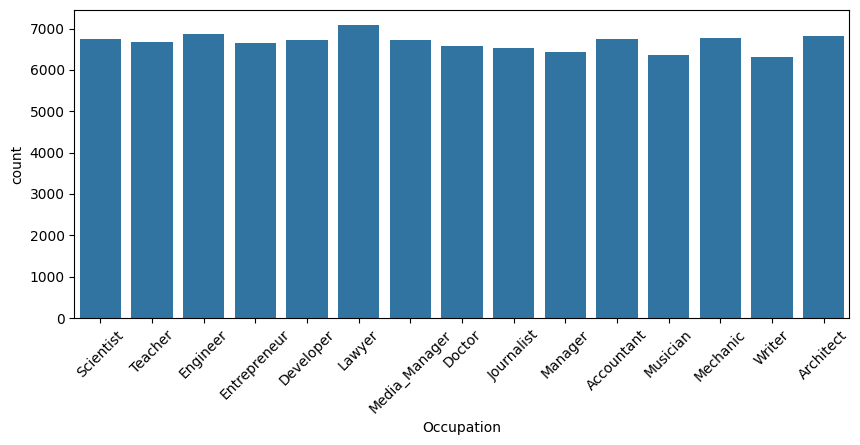

In [187]:
plt.figure(figsize=[10,4])
sns.countplot(x='Occupation',data=credit_df)
plt.xticks(rotation=45)
plt.show()

#### Type of Loan

In [188]:
def type_of_loan(x):
    if pd.notna(x):
        x = x.lower().replace("and ", "")
        x = x.replace(", ", ",")
        x = x.strip()
        return x
    else:
        return x

In [189]:
credit_df["Type_of_Loan"] = credit_df["Type_of_Loan"].apply(type_of_loan)

In [25]:
# Unique loans that all of these customer took
unique_loans = []
for each_row in credit_df["Type_of_Loan"].dropna():
#     print(each_row.split(","))
    for each_loan in each_row.split(","):
        if each_loan not in unique_loans:
            unique_loans.append(each_loan)

unique_loans = dict(enumerate(sorted(unique_loans)))
unique_loans

{0: 'auto loan',
 1: 'credit-builder loan',
 2: 'debt consolidation loan',
 3: 'home equity loan',
 4: 'mortgage loan',
 5: 'not specified',
 6: 'payday loan',
 7: 'personal loan',
 8: 'student loan'}

In [190]:
#before
credit_df.groupby("Customer_ID")["Type_of_Loan"].apply(list)

Customer_ID
CUS_0x1000    [credit-builder loan,home equity loan, credit-...
CUS_0x1009    [not specified,home equity loan,credit-builder...
CUS_0x100b             [nan, nan, nan, nan, nan, nan, nan, nan]
CUS_0x1011    [student loan,credit-builder loan,debt consoli...
CUS_0x1013    [student loan,debt consolidation loan,personal...
                                    ...                        
CUS_0xff3     [personal loan,mortgage loan,auto loan, person...
CUS_0xff4     [not specified,student loan,student loan,credi...
CUS_0xff6     [home equity loan,auto loan, home equity loan,...
CUS_0xffc     [credit-builder loan,payday loan,not specified...
CUS_0xffd     [auto loan,payday loan,payday loan,mortgage lo...
Name: Type_of_Loan, Length: 12500, dtype: object

In [191]:
# group mode is not required 
# since for a customer whose one instance has nan, its all instances have nan.
credit_df["Type_of_Loan"].replace(np.NaN,"No Data", inplace=True)

#### Credit Mix

In [28]:
# before
credit_df.groupby("Customer_ID")["Credit_Mix"].apply(list)

Customer_ID
1006     [Standard, Standard, Standard, Standard, Stand...
1007     [nan, Standard, Standard, Standard, nan, Stand...
1008     [nan, Standard, Standard, nan, Standard, Stand...
1009     [Standard, nan, Standard, Standard, Standard, ...
1011     [nan, nan, Standard, Standard, Standard, Stand...
                               ...                        
50984    [nan, Standard, nan, Standard, Standard, nan, ...
50990    [Standard, nan, Standard, Standard, Standard, ...
50992    [Standard, Standard, Standard, Standard, Stand...
50996    [Standard, nan, Standard, Standard, Standard, ...
50999       [Good, Good, Good, nan, Good, Good, nan, Good]
Name: Credit_Mix, Length: 12500, dtype: object

In [192]:
credit_df["Credit_Mix"] = group_mode(credit_df, "Customer_ID", column = "Credit_Mix")

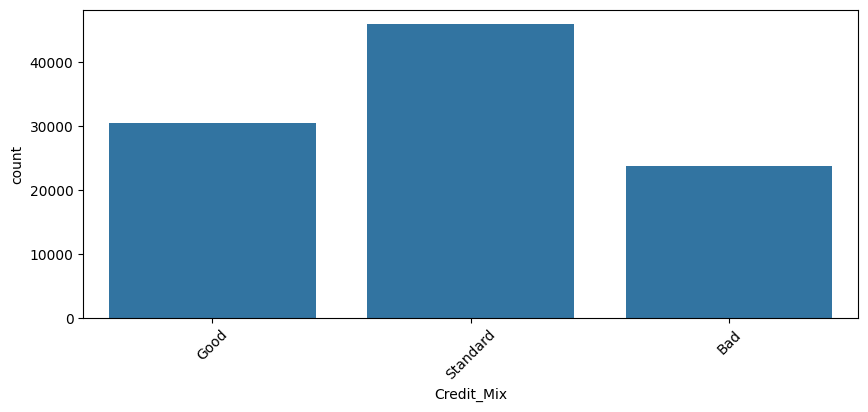

In [193]:
plt.figure(figsize=[10,4])
sns.countplot(x='Credit_Mix',data=credit_df)
plt.xticks(rotation=45)
plt.show()

#### Payment Behaviour

In [30]:
# before
credit_df.groupby("Customer_ID")["Payment_Behaviour"].apply(list)
# check customer id = 1009

Customer_ID
1006     [High_spent_Medium_value_payments, Low_spent_M...
1007     [High_spent_Medium_value_payments, High_spent_...
1008     [High_spent_Small_value_payments, Low_spent_La...
1009     [High_spent_Medium_value_payments, High_spent_...
1011     [High_spent_Small_value_payments, Low_spent_Sm...
                               ...                        
50984    [Low_spent_Small_value_payments, Low_spent_Lar...
50990    [High_spent_Large_value_payments, High_spent_S...
50992    [Low_spent_Medium_value_payments, Low_spent_La...
50996    [Low_spent_Medium_value_payments, High_spent_M...
50999    [High_spent_Small_value_payments, High_spent_L...
Name: Payment_Behaviour, Length: 12500, dtype: object

In [194]:
credit_df["Payment_Behaviour"] = group_mode(credit_df, "Customer_ID", column = "Payment_Behaviour")

In [32]:
credit_df.describe(include='O').isnull().sum()

Occupation               0
Type_of_Loan             0
Credit_Mix               0
Payment_of_Min_Amount    0
Payment_Behaviour        0
Credit_Score             0
dtype: int64

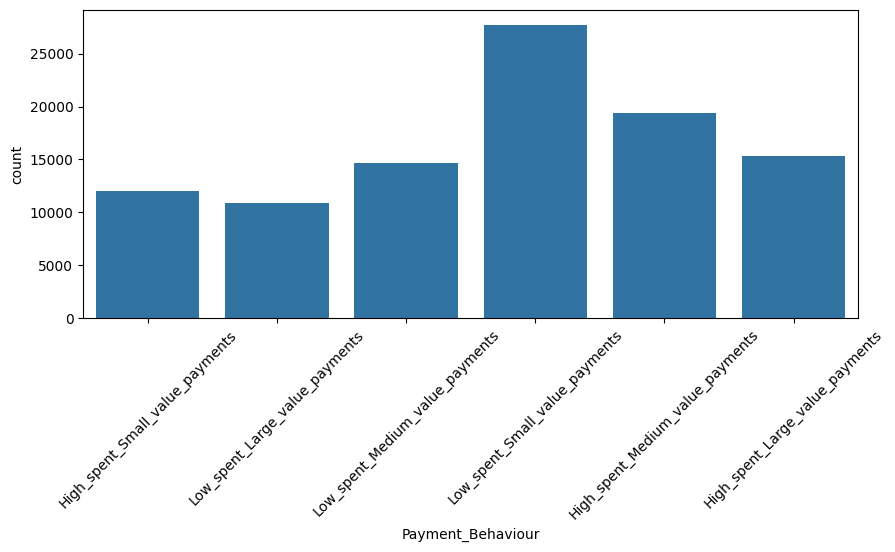

In [195]:
plt.figure(figsize=[10,4])
sns.countplot(x='Payment_Behaviour',data=credit_df)
plt.xticks(rotation=45)
plt.show()

#### Credit Score

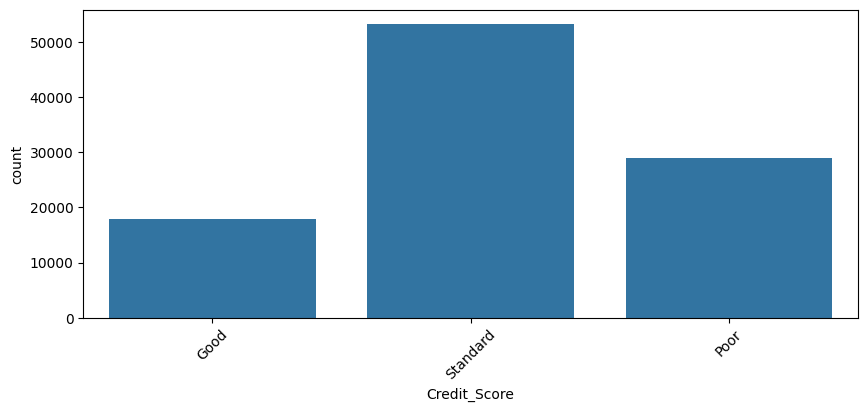

In [196]:
plt.figure(figsize=[10,4])
sns.countplot(x='Credit_Score',data=credit_df)
plt.xticks(rotation=45)
plt.show()

### Numerical Variables

In [33]:
# Define Outlier Range
def get_iqr_lower_upper(dataframe, column, multiply=1.5):
    q1 = dataframe[column].quantile(0.25)
    q3 = dataframe[column].quantile(0.75)
    iqr = q3 - q1
    
    lower = q1-iqr*multiply
    upper = q3+iqr*multiply
    affect = dataframe.loc[(dataframe[column]<lower)|(dataframe[column]>upper)].shape
    print('Outliers:', affect)
    return lower, upper

In [34]:
def replace_group_outliers_fillna(dataframe, group_by, column):
    # drop nan values before doing anything
    df_dropped = dataframe[dataframe[column].notna()]
    # for each customer(group) : list all the values in the column for a group
    df_grouped = df_dropped.groupby(group_by)[column].apply(list)
    # find groupwise mode
    df_grouped = df_grouped.apply(lambda x: stats.mode(x)[0])
    # above dataframe will have groupby modes then calculate min and max of all customers
    mini, maxi = df_grouped.apply([min, max])
    # assign Wrong Values to NaN
    col = dataframe[column].apply(lambda x: np.NaN if ((x<mini)|(x>maxi)) else x) # or condition
    
    mode_by_group = dataframe.groupby(group_by)[column].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)
    result = col.fillna(mode_by_group)
    
    return result

#### Age

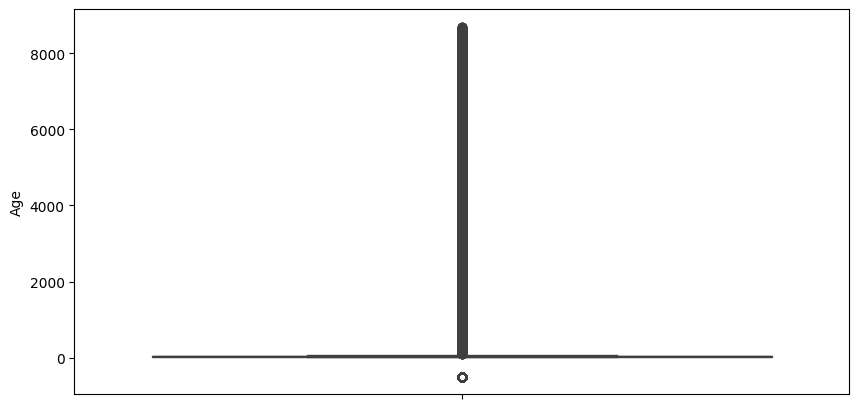

In [35]:
plt.figure(figsize = (10,5))
sns.boxplot(credit_df['Age'])
plt.show()

In [36]:
credit_df.groupby('Customer_ID')['Age'].apply(list)

Customer_ID
1006     [37.0, 38.0, 38.0, 8153.0, 38.0, 38.0, 38.0, 3...
1007      [48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0]
1008     [3452.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 3...
1009      [22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 23.0]
1011      [43.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0]
                               ...                        
50984     [20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0]
50990    [38.0, 38.0, 4706.0, 38.0, 38.0, 38.0, 38.0, 3...
50992     [23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 24.0, 24.0]
50996    [3891.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 3...
50999     [46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0]
Name: Age, Length: 12500, dtype: object

In [37]:
credit_df["Age"] = replace_group_outliers_fillna(credit_df, "Customer_ID", "Age")

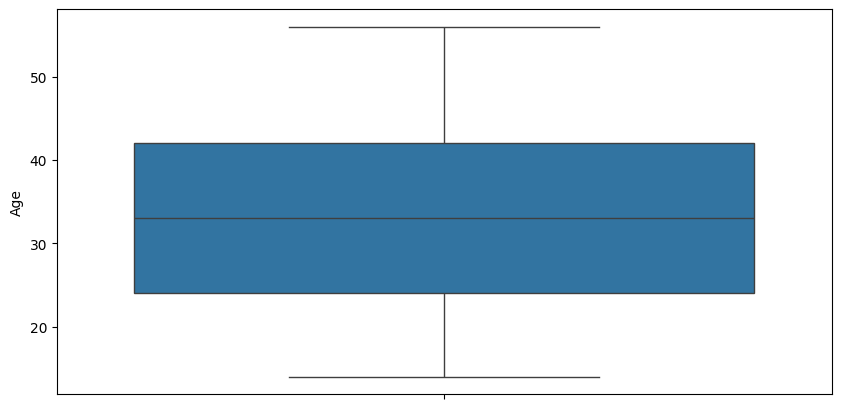

In [38]:
plt.figure(figsize = (10,5))
sns.boxplot(credit_df['Age'])
plt.show()

In [39]:
get_iqr_lower_upper(credit_df, "Age")
# No outliers (0,25)

Outliers: (0, 25)


(-3.0, 69.0)

#### Annual Income

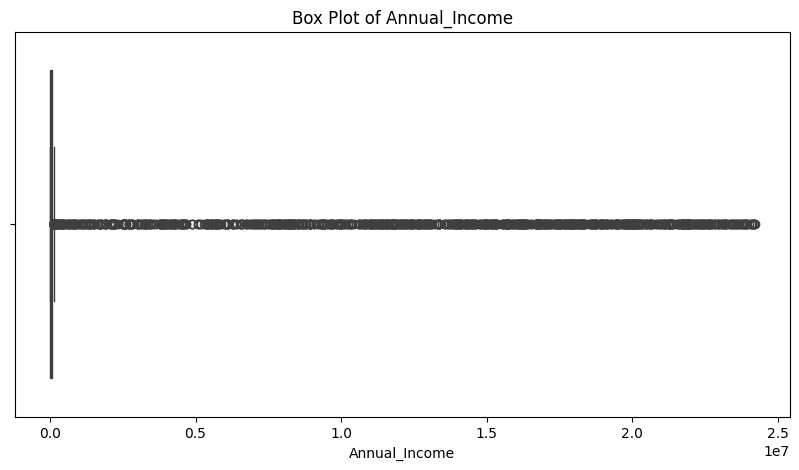

In [40]:
plt.figure(figsize = (10,5))
sns.boxplot(data = credit_df, x = "Annual_Income")
plt.title("Box Plot of Annual_Income")
plt.show()

In [41]:
credit_df["Annual_Income"] = replace_group_outliers_fillna(credit_df, "Customer_ID", "Annual_Income")

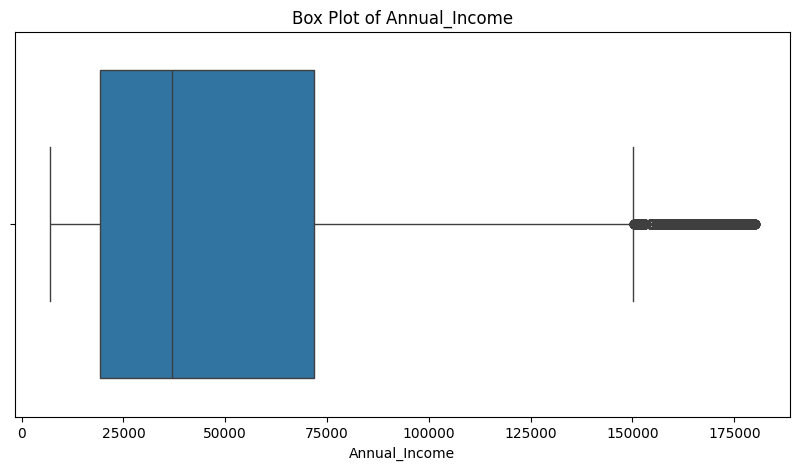

In [42]:
plt.figure(figsize = (10,5))
sns.boxplot(data = credit_df, x = "Annual_Income")
plt.title("Box Plot of Annual_Income")
plt.show()

In [43]:
get_iqr_lower_upper(credit_df, "Annual_Income")
# still has some otliers >>> 2000 to be exact.

Outliers: (2000, 25)


(-59167.77374999999, 150194.21625)

#### Monthly InHand Salary

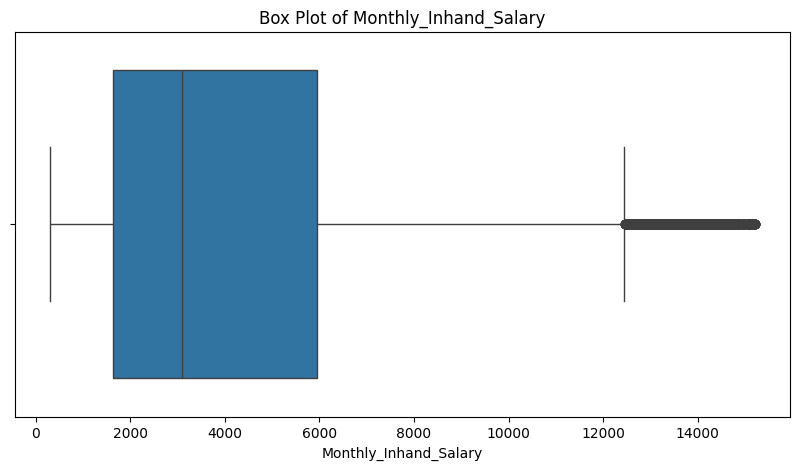

In [44]:
plt.figure(figsize = (10,5))
sns.boxplot(data = credit_df, x = "Monthly_Inhand_Salary")
plt.title("Box Plot of Monthly_Inhand_Salary")
plt.show()

In [45]:
credit_df["Monthly_Inhand_Salary"] = replace_group_outliers_fillna(credit_df, "Customer_ID", "Monthly_Inhand_Salary")

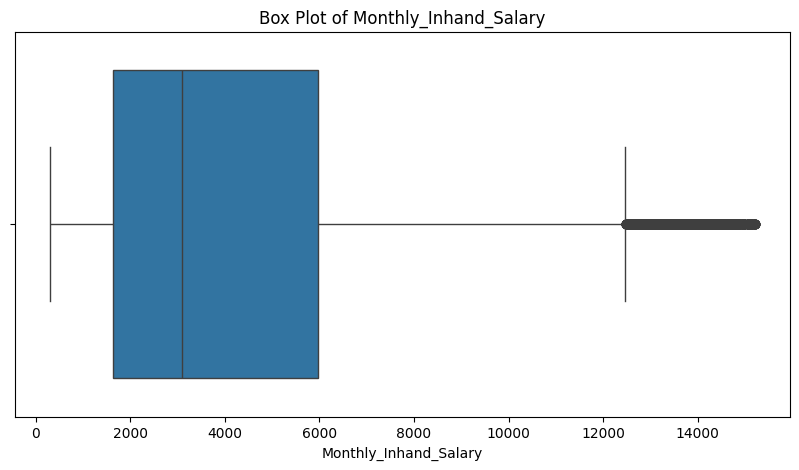

In [46]:
plt.figure(figsize = (10,5))
sns.boxplot(data = credit_df, x = "Monthly_Inhand_Salary")
plt.title("Box Plot of Monthly_Inhand_Salary")
plt.show()

In [47]:
get_iqr_lower_upper(credit_df, "Monthly_Inhand_Salary")
# still has some otliers
# it seems like the replace_group_outliers_fillna function was not that effective on this column

Outliers: (2010, 25)


(-4875.552083333334, 12463.95125)

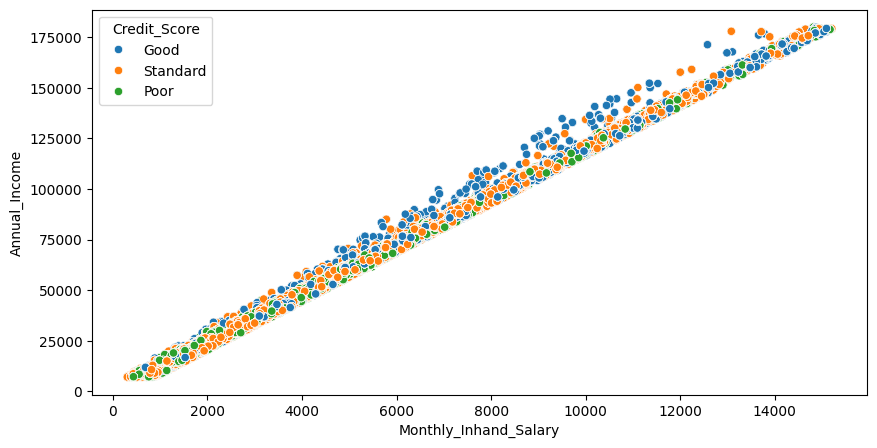

In [48]:
plt.figure(figsize = (10,5))
sns.scatterplot(data=credit_df, x="Monthly_Inhand_Salary", y="Annual_Income", hue="Credit_Score")
plt.show()
# high +ve linear corelation between features

#### Num Bank Accounts

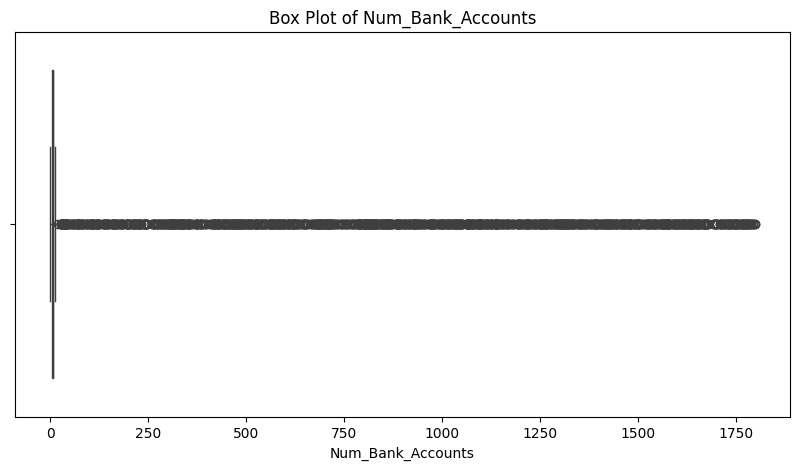

In [49]:
plt.figure(figsize = (10,5))
sns.boxplot(data = credit_df, x = "Num_Bank_Accounts")
plt.title("Box Plot of Num_Bank_Accounts")
plt.show()

In [50]:
credit_df["Num_Bank_Accounts"] = replace_group_outliers_fillna(credit_df, "Customer_ID", "Num_Bank_Accounts")

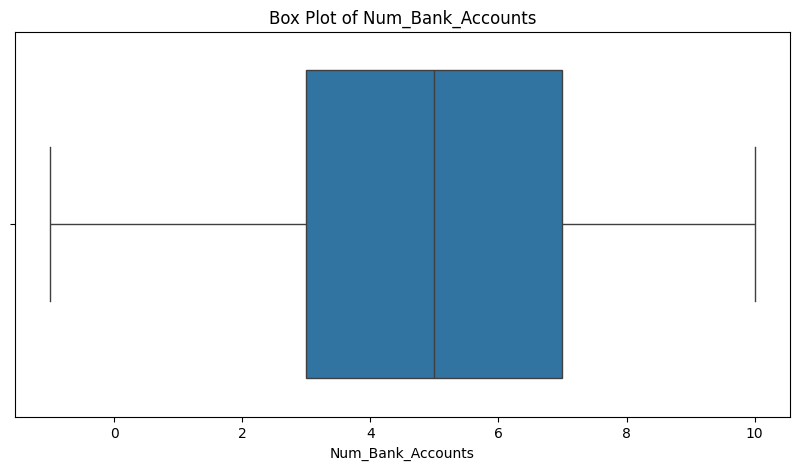

In [51]:
plt.figure(figsize = (10,5))
sns.boxplot(data = credit_df, x = "Num_Bank_Accounts")
plt.title("Box Plot of Num_Bank_Accounts")
plt.show()

In [52]:
get_iqr_lower_upper(credit_df, "Num_Bank_Accounts")
# no outliers

Outliers: (0, 25)


(-3.0, 13.0)

#### Num Credit Card

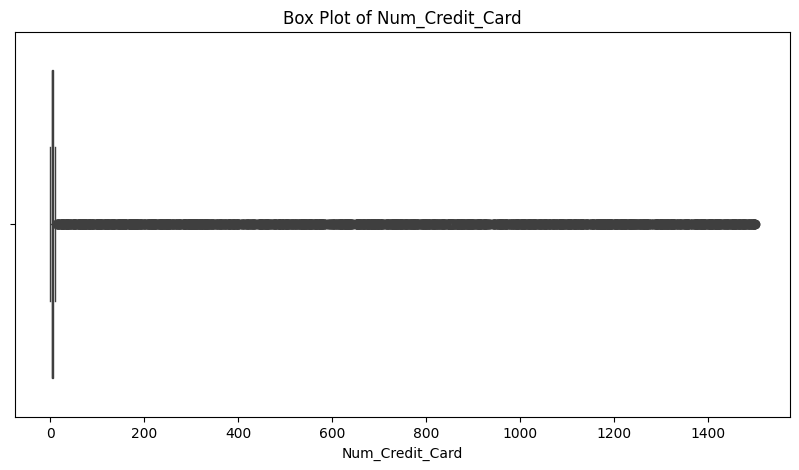

In [53]:
plt.figure(figsize = (10,5))
sns.boxplot(data = credit_df, x = "Num_Credit_Card")
plt.title("Box Plot of Num_Credit_Card")
plt.show()

In [54]:
credit_df["Num_Credit_Card"] = replace_group_outliers_fillna(credit_df, "Customer_ID", "Num_Credit_Card")

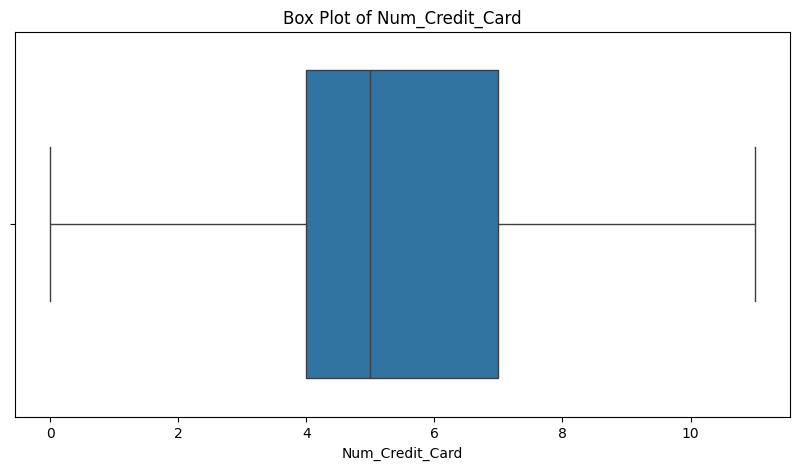

In [55]:
plt.figure(figsize = (10,5))
sns.boxplot(data = credit_df, x = "Num_Credit_Card")
plt.title("Box Plot of Num_Credit_Card")
plt.show()

In [56]:
get_iqr_lower_upper(credit_df, "Num_Credit_Card")

Outliers: (0, 25)


(-0.5, 11.5)

#### Interest Rate

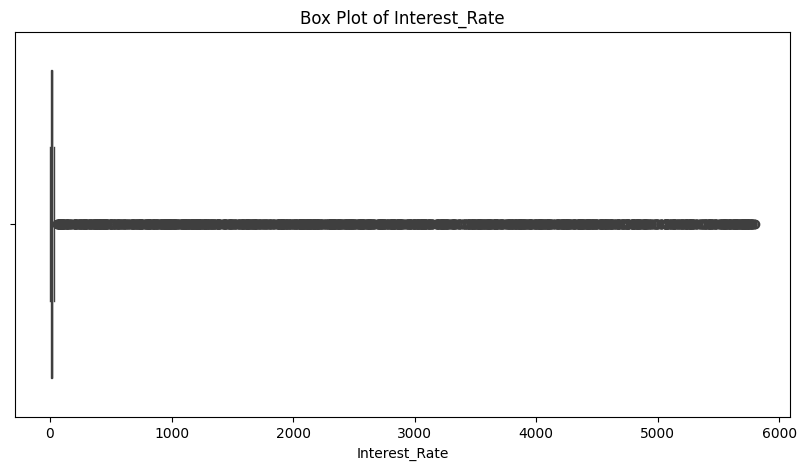

In [57]:
plt.figure(figsize = (10,5))
sns.boxplot(data = credit_df, x = "Interest_Rate")
plt.title("Box Plot of Interest_Rate")
plt.show()

In [58]:
credit_df["Interest_Rate"] = replace_group_outliers_fillna(credit_df, "Customer_ID", "Interest_Rate")

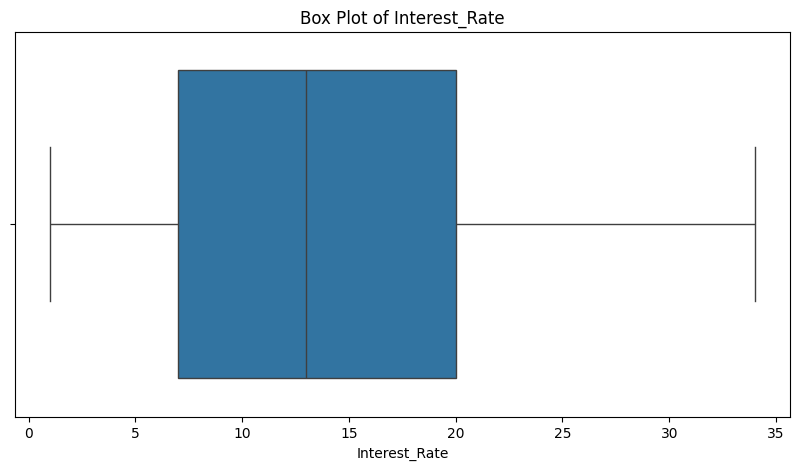

In [59]:
plt.figure(figsize = (10,5))
sns.boxplot(data = credit_df, x = "Interest_Rate")
plt.title("Box Plot of Interest_Rate")
plt.show()

In [60]:
get_iqr_lower_upper(credit_df, "Interest_Rate")

Outliers: (0, 25)


(-12.5, 39.5)

#### No of Loan

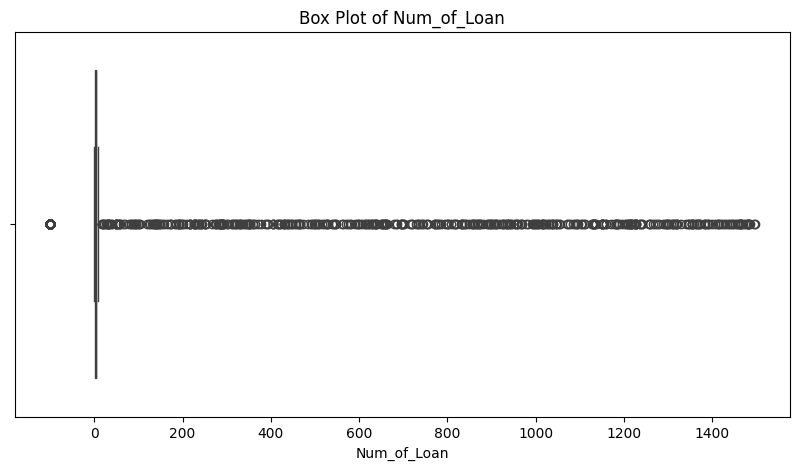

In [61]:
plt.figure(figsize = (10,5))
sns.boxplot(data = credit_df, x = "Num_of_Loan")
plt.title("Box Plot of Num_of_Loan")
plt.show()

In [62]:
credit_df["Num_of_Loan"] = replace_group_outliers_fillna(credit_df, "Customer_ID", "Num_of_Loan")

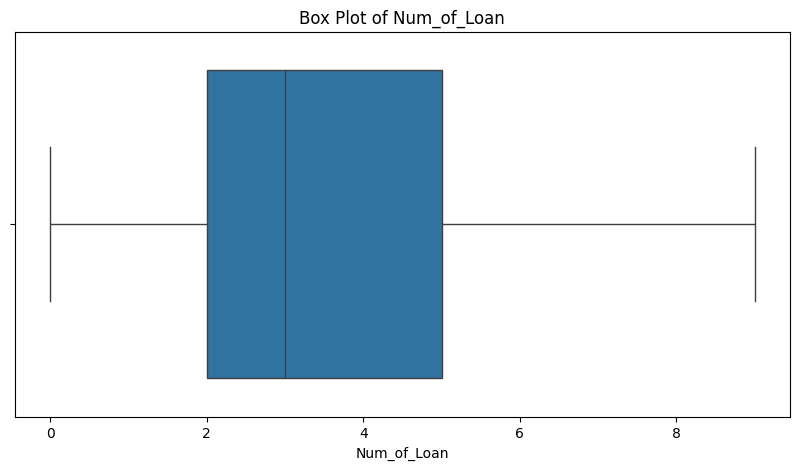

In [63]:
plt.figure(figsize = (10,5))
sns.boxplot(data = credit_df, x = "Num_of_Loan")
plt.title("Box Plot of Num_of_Loan")
plt.show()

In [64]:
get_iqr_lower_upper(credit_df, "Num_of_Loan")

Outliers: (0, 25)


(-2.5, 9.5)

#### Delay From Due Date

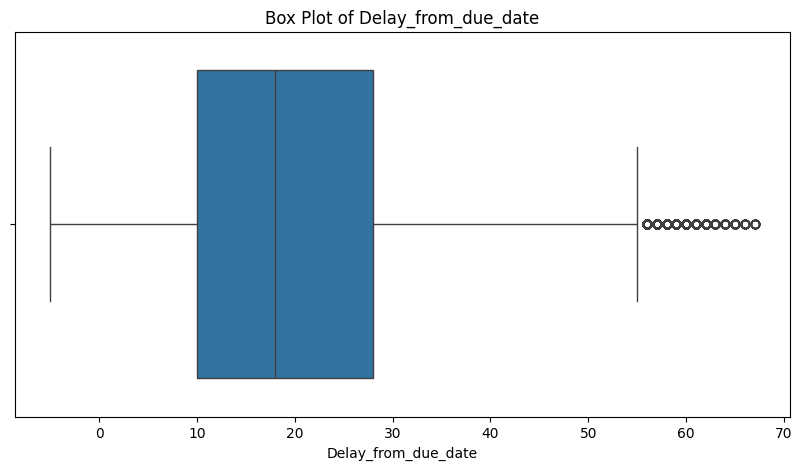

In [65]:
plt.figure(figsize = (10,5))
sns.boxplot(data = credit_df, x = "Delay_from_due_date")
plt.title("Box Plot of Delay_from_due_date")
plt.show()

In [66]:
credit_df["Delay_from_due_date"] = replace_group_outliers_fillna(credit_df, "Customer_ID", "Delay_from_due_date")

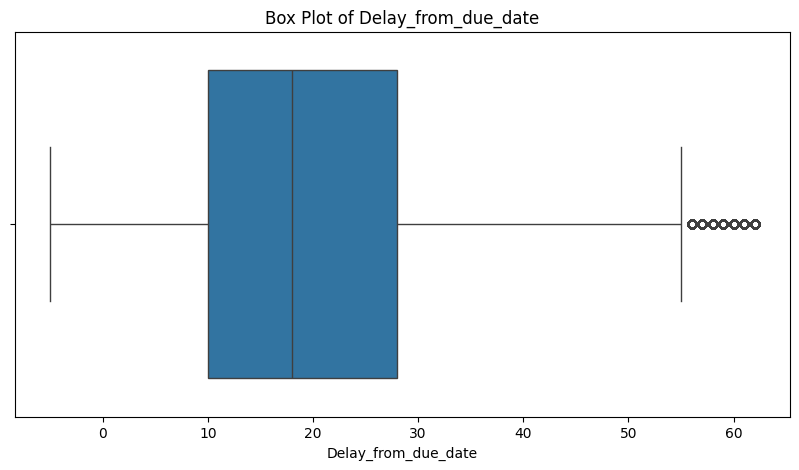

In [67]:
plt.figure(figsize = (10,5))
sns.boxplot(data = credit_df, x = "Delay_from_due_date")
plt.title("Box Plot of Delay_from_due_date")
plt.show()

In [68]:
get_iqr_lower_upper(credit_df, "Delay_from_due_date")

Outliers: (4002, 25)


(-17.0, 55.0)

#### Num of Delayed Payment

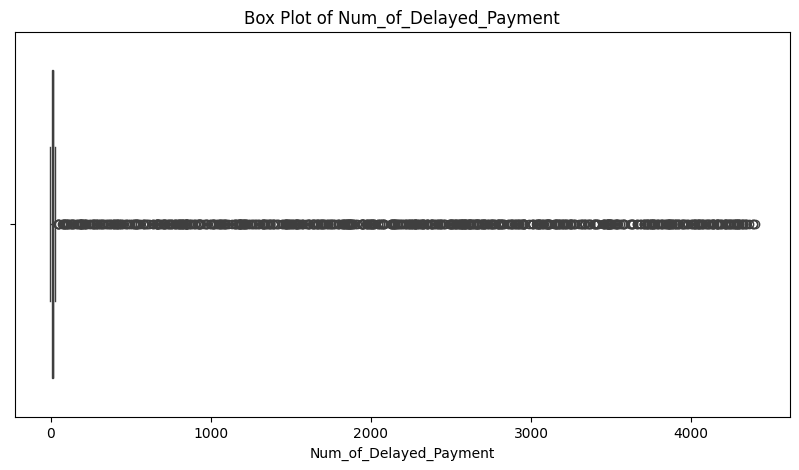

In [69]:
plt.figure(figsize = (10,5))
sns.boxplot(data = credit_df, x = "Num_of_Delayed_Payment")
plt.title("Box Plot of Num_of_Delayed_Payment")
plt.show()

In [70]:
credit_df["Num_of_Delayed_Payment"] = replace_group_outliers_fillna(credit_df, "Customer_ID","Num_of_Delayed_Payment")

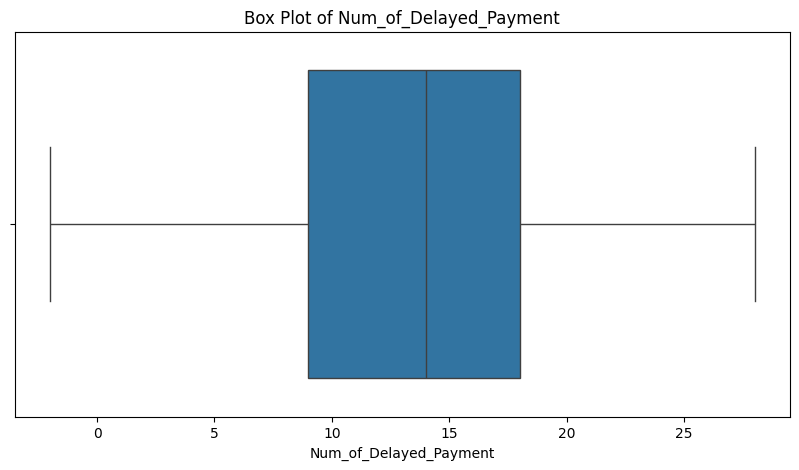

In [71]:
plt.figure(figsize = (10,5))
sns.boxplot(data = credit_df, x = "Num_of_Delayed_Payment")
plt.title("Box Plot of Num_of_Delayed_Payment")
plt.show()

In [72]:
get_iqr_lower_upper(credit_df, "Num_of_Delayed_Payment")

Outliers: (0, 25)


(-4.5, 31.5)

#### Changed Credit Limit

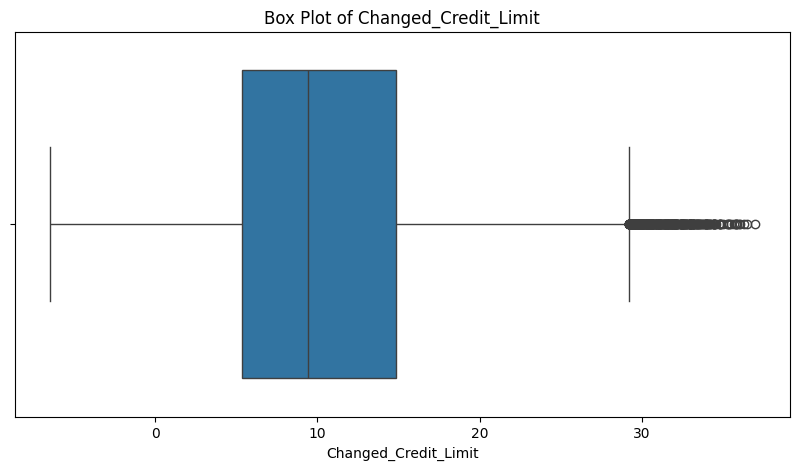

In [73]:
plt.figure(figsize = (10,5))
sns.boxplot(data = credit_df, x = "Changed_Credit_Limit")
plt.title("Box Plot of Changed_Credit_Limit")
plt.show()

In [74]:
credit_df["Changed_Credit_Limit"] = replace_group_outliers_fillna(credit_df, "Customer_ID", "Changed_Credit_Limit")

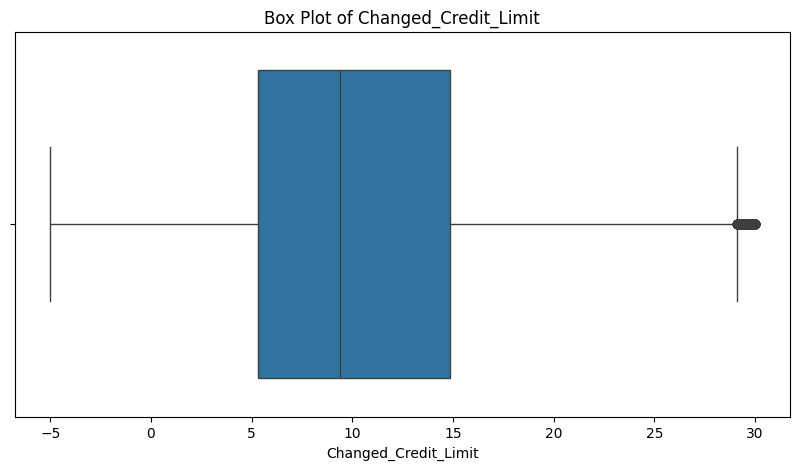

In [75]:
plt.figure(figsize = (10,5))
sns.boxplot(data = credit_df, x = "Changed_Credit_Limit")
plt.title("Box Plot of Changed_Credit_Limit")
plt.show()

In [76]:
get_iqr_lower_upper(credit_df, "Changed_Credit_Limit")

Outliers: (522, 25)


(-8.925, 29.115000000000002)

#### Num of Credit Enquires

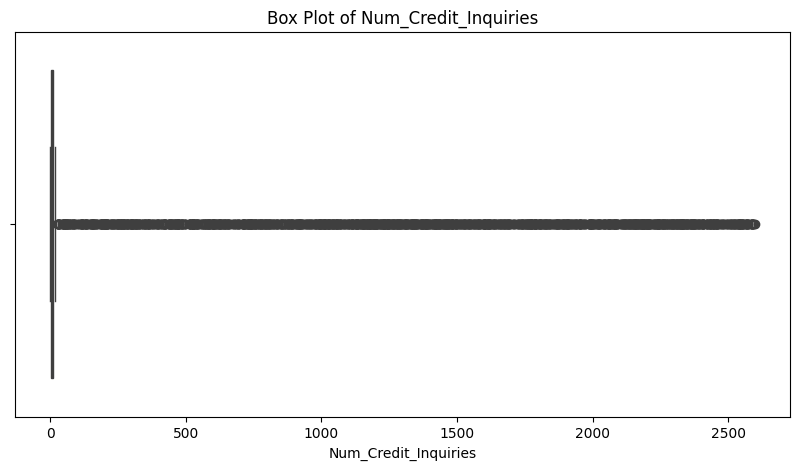

In [77]:
plt.figure(figsize = (10,5))
sns.boxplot(data = credit_df, x = "Num_Credit_Inquiries")
plt.title("Box Plot of Num_Credit_Inquiries")
plt.show()

In [78]:
credit_df["Num_Credit_Inquiries"] = replace_group_outliers_fillna(credit_df, "Customer_ID", "Num_Credit_Inquiries")

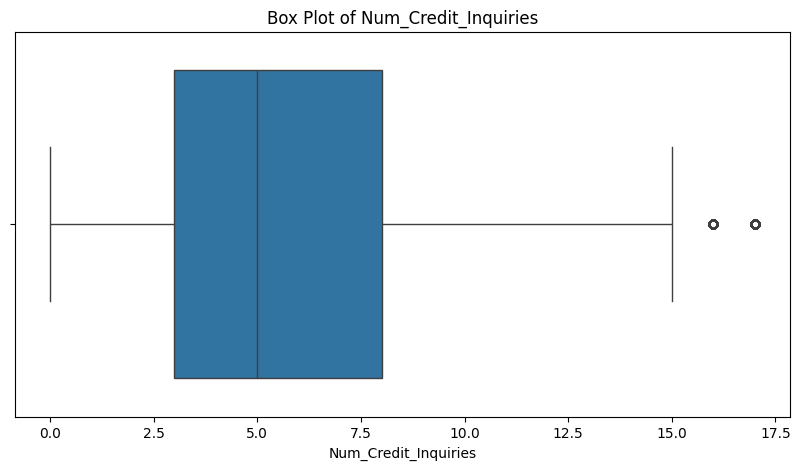

In [79]:
plt.figure(figsize = (10,5))
sns.boxplot(data = credit_df, x = "Num_Credit_Inquiries")
plt.title("Box Plot of Num_Credit_Inquiries")
plt.show()

#### Outstanding_Debt               

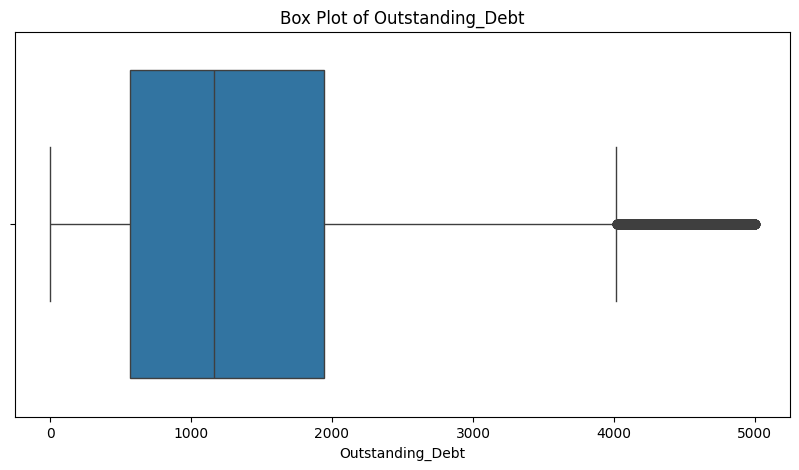

In [80]:
plt.figure(figsize = (10,5))
sns.boxplot(data = credit_df, x = "Outstanding_Debt")
plt.title("Box Plot of Outstanding_Debt")
plt.show()

In [81]:
credit_df["Outstanding_Debt"] = replace_group_outliers_fillna(credit_df, "Customer_ID", "Outstanding_Debt")

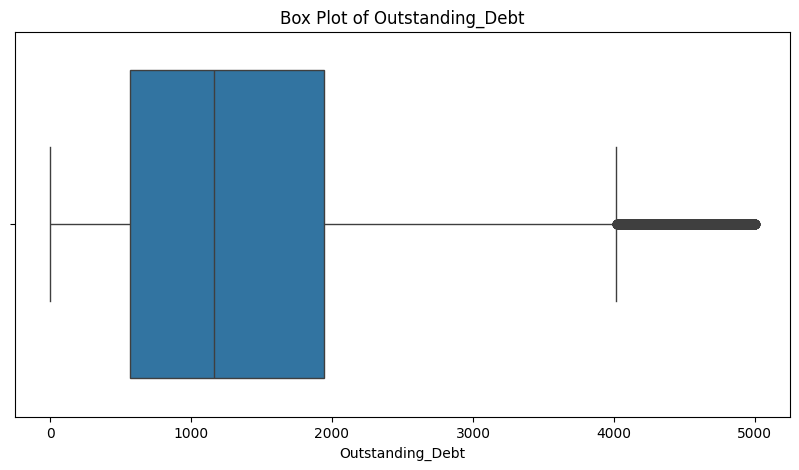

In [82]:
plt.figure(figsize = (10,5))
sns.boxplot(data =credit_df, x = "Outstanding_Debt")
plt.title("Box Plot of Outstanding_Debt")
plt.show()

#### Credit_Utilization_Ratio

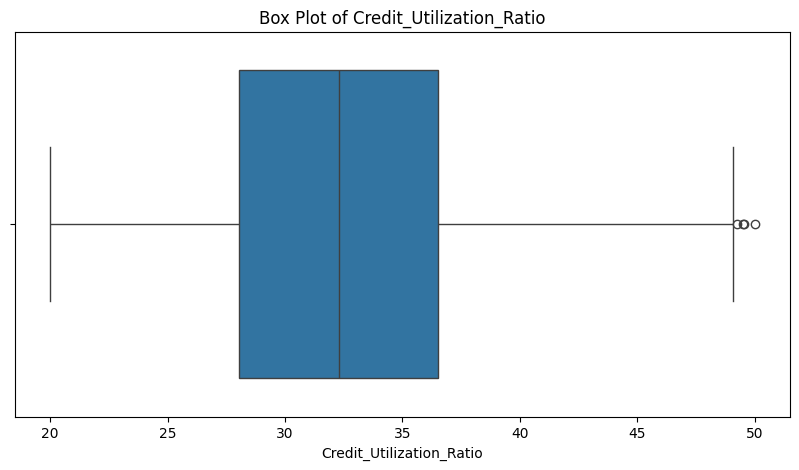

In [83]:
plt.figure(figsize = (10,5))
sns.boxplot(data = credit_df, x = "Credit_Utilization_Ratio")
plt.title("Box Plot of Credit_Utilization_Ratio")
plt.show()

#### Credit Histroy Age

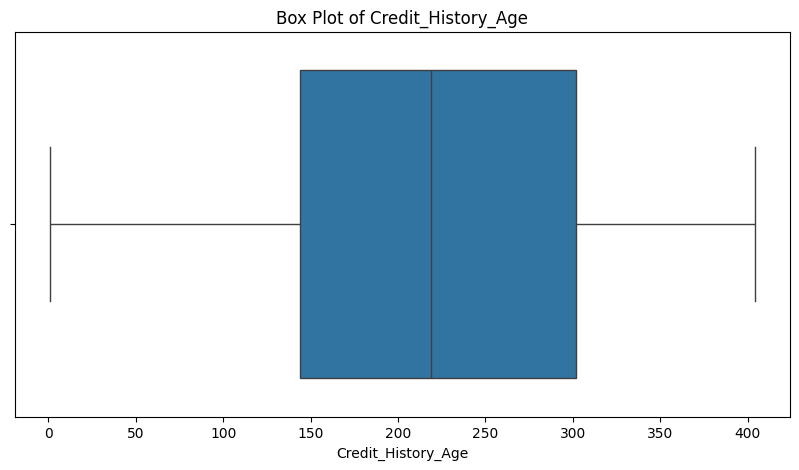

In [84]:
plt.figure(figsize = (10,5))
sns.boxplot(data = credit_df, x = "Credit_History_Age")
plt.title("Box Plot of Credit_History_Age")
plt.show()

In [85]:
credit_df['Credit_History_Age'] = credit_df.groupby("Customer_ID", group_keys=False)["Credit_History_Age"].apply(lambda x: x.interpolate().bfill().ffill())


#### Total_EMI_per_month

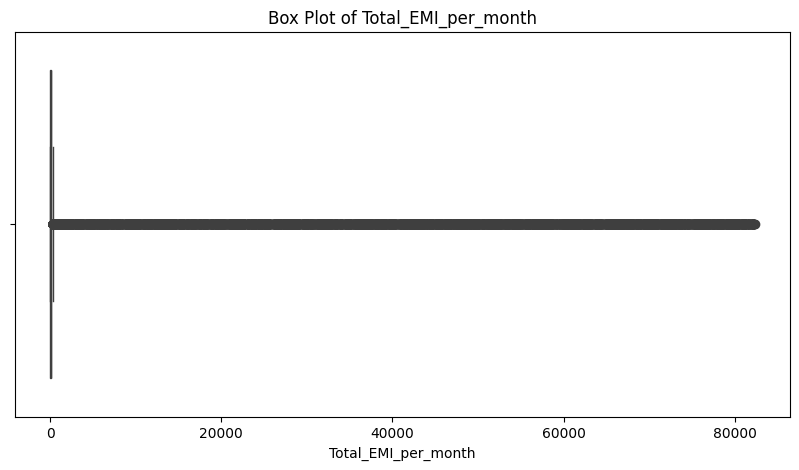

In [86]:
plt.figure(figsize = (10,5))
sns.boxplot(data = credit_df, x = "Total_EMI_per_month")
plt.title("Box Plot of Total_EMI_per_month")
plt.show()

In [87]:
credit_df["Total_EMI_per_month"] = replace_group_outliers_fillna(credit_df, "Customer_ID", "Total_EMI_per_month")

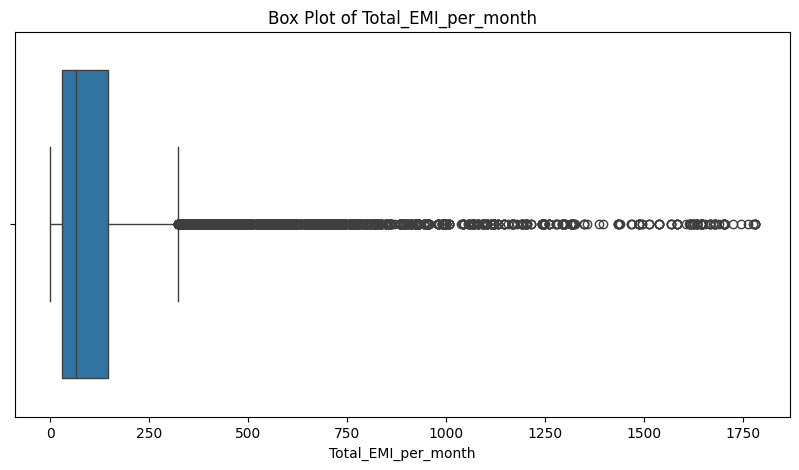

In [88]:
plt.figure(figsize = (10,5))
sns.boxplot(data = credit_df, x = "Total_EMI_per_month")
plt.title("Box Plot of Total_EMI_per_month")
plt.show()

#### Amount_invested_monthly

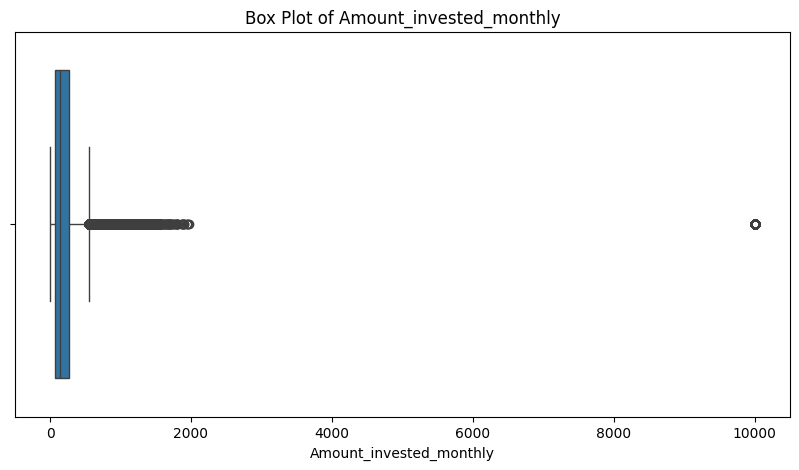

In [89]:
plt.figure(figsize = (10,5))
sns.boxplot(data = credit_df, x = "Amount_invested_monthly")
plt.title("Box Plot of Amount_invested_monthly")
plt.show()

In [90]:
credit_df["Amount_invested_monthly"] = replace_group_outliers_fillna(credit_df, "Customer_ID", "Amount_invested_monthly")

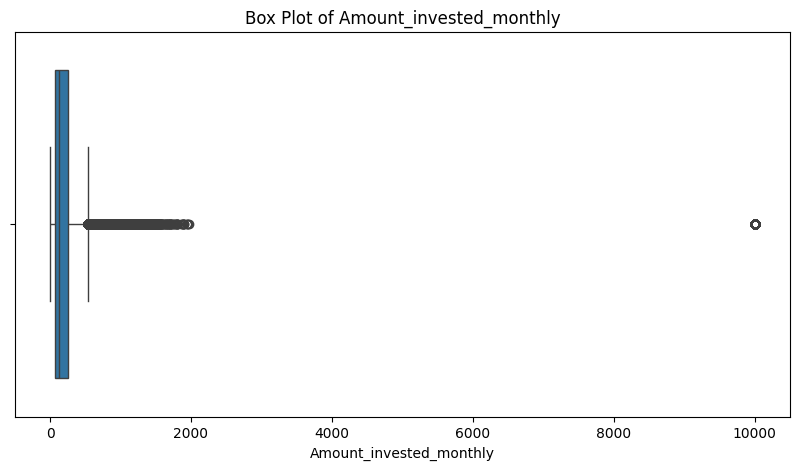

In [91]:
plt.figure(figsize = (10,5))
sns.boxplot(data =credit_df, x = "Amount_invested_monthly")
plt.title("Box Plot of Amount_invested_monthly")
plt.show()

#### Monthly Balance

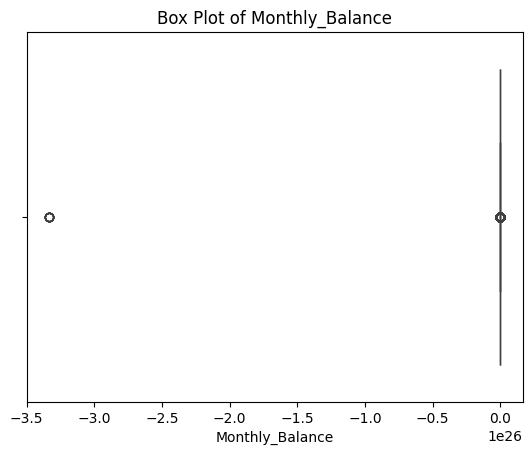

In [92]:
sns.boxplot(data = credit_df, x = "Monthly_Balance")
plt.title("Box Plot of Monthly_Balance")
plt.show()

In [93]:
credit_df["Monthly_Balance"] = replace_group_outliers_fillna(credit_df, "Customer_ID", "Monthly_Balance")

### Checking Null Values

In [94]:
credit_df.isnull().sum()

Customer_ID                 0
Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

Num_Bank_Accounts, Delay_from_due_date, Num_of_Delayed_Payment, Monthly_Balance have negative strange number Amount_invested_monthly have positive strange number

In [95]:
# hence replace them with zero
credit_df.loc[credit_df["Num_Bank_Accounts"]<0, "Num_Bank_Accounts"]=0

In [96]:
# replacing zero with NaN
credit_df.loc[credit_df["Delay_from_due_date"]<0, "Delay_from_due_date"] = np.NaN

In [97]:
credit_df["Delay_from_due_date"] = replace_group_outliers_fillna(credit_df, "Customer_ID", "Delay_from_due_date")

In [98]:
credit_df.loc[credit_df["Num_of_Delayed_Payment"]<0, "Num_of_Delayed_Payment"] = np.NaN

In [99]:
credit_df["Num_of_Delayed_Payment"] = replace_group_outliers_fillna(credit_df, "Customer_ID", "Num_of_Delayed_Payment")

In [100]:
credit_df.loc[credit_df["Monthly_Balance"]<0, "Monthly_Balance"] = np.NaN

In [101]:
credit_df["Monthly_Balance"] = replace_group_outliers_fillna(credit_df, "Customer_ID", "Monthly_Balance")

In [102]:
# Anything above the max value is considered as outlier.
credit_df.loc[credit_df["Amount_invested_monthly"]>=10000, "Amount_invested_monthly"] = np.NaN

In [103]:
# fill group Mode
credit_df["Amount_invested_monthly"] =credit_df.groupby("Customer_ID")["Amount_invested_monthly"].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)

#### DataHandling is done and Data is cleaned

## Data Preparation

In [104]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  int64  
 1   Month                     100000 non-null  int32  
 2   Age                       100000 non-null  float64
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     100000 non-null  float64
 6   Num_Bank_Accounts         100000 non-null  float64
 7   Num_Credit_Card           100000 non-null  float64
 8   Interest_Rate             100000 non-null  float64
 9   Num_of_Loan               100000 non-null  float64
 10  Type_of_Loan              100000 non-null  object 
 11  Delay_from_due_date       100000 non-null  float64
 12  Num_of_Delayed_Payment    100000 non-null  float64
 13  Changed_Credit_Limit      100000 non-null  fl

In [105]:
credit_df.describe(include='O').columns

Index(['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

In [106]:
cat_cols = ['Occupation','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour']

### Convert Categorical Values to Numeric values

In [107]:
for col in cat_cols:
    dummies = pd.get_dummies(credit_df[col],prefix=col,dtype=int)
    credit_df = pd.concat([credit_df,dummies],axis=1)
    credit_df.drop(col,axis=1,inplace=True)
    

In [108]:
credit_df.head()

,Customer_ID,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,...,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,3392,1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",3.0,7.0,11.27,4.0,809.98,26.822620,265.0,49.574949,24.785217,312.494089,...,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0
1,3392,2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",3.0,4.0,11.27,4.0,809.98,31.944960,266.0,49.574949,24.785217,284.629162,...,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0
2,3392,3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",3.0,7.0,11.27,4.0,809.98,28.609352,267.0,49.574949,24.785217,331.209863,...,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0
3,3392,4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",5.0,4.0,6.27,4.0,809.98,31.377862,268.0,49.574949,24.785217,223.451310,...,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1
4,3392,5,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",6.0,4.0,11.27,4.0,809.98,24.797347,269.0,49.574949,24.785217,341.489231,...,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0


In [109]:
credit_df.shape

(100000, 48)

In [110]:
credit_df['Credit_Score'].value_counts(normalize=True)

Credit_Score
Standard    0.53174
Poor        0.28998
Good        0.17828
Name: proportion, dtype: float64

In [111]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()
# should be used to encode target values, i.e. y, and not the input X.

In [112]:
credit_df['Credit_Score'] = LabelEncoder.fit_transform(credit_df['Credit_Score'])

In [113]:
credit_df['Credit_Score'].head()

0    0
1    0
2    0
3    0
4    0
Name: Credit_Score, dtype: int32

##### Droping Unnecessary Columns

In [114]:
df_copy = credit_df.copy()

In [115]:
### Drop Customer Id, Month, Type_of_loan
credit_df = credit_df.drop(columns=['Customer_ID','Month','Type_of_Loan'])

In [116]:
credit_df.shape

(100000, 45)

## Feature Scaling

In [117]:
X = credit_df.drop('Credit_Score',axis=1)
y = credit_df['Credit_Score']

In [118]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=42)

In [120]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(70000, 44)
(70000,)
(30000, 44)
(30000,)


In [121]:
scaler = StandardScaler()

In [122]:
X_train_cols = X_train.columns

In [123]:
num_cols = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance']

In [124]:
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

In [125]:
X_train.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Occupation_Accountant,Occupation_Architect,Occupation_Developer,...,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
76513,-1.145957,2.646503,2.712283,-0.910478,0.711098,-0.400336,-0.215757,-0.949603,0.112434,-1.473044,-0.716891,-0.922256,1.164648,1.381238,0.886715,1.152201,0.844650,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
60406,-0.681399,1.306495,1.282550,-0.524838,-1.220821,-0.400336,-1.442214,-1.220233,0.112434,0.413206,-0.976332,-0.373322,1.643947,1.722664,-0.814481,1.308245,2.574467,1,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0
27322,0.340628,-0.187605,-0.201450,-1.681756,-1.220821,-1.201469,-0.215757,-0.678973,-0.366408,-0.056869,-0.457450,-0.274745,0.537745,1.702581,-0.247657,-0.519244,-0.155727,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
53699,0.061894,0.788029,0.739105,-0.139199,-0.737841,1.774168,0.193062,-0.881945,0.431662,-0.416863,-0.198009,0.053949,0.160568,-1.320045,0.211843,0.327381,0.761887,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
65412,0.898098,0.810151,0.883960,0.632079,-0.737841,-0.858126,-0.624576,-0.814288,-0.047180,0.094864,-0.198009,-0.422420,-0.931780,-1.058954,-0.114129,0.208910,0.774285,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0


## Model Training 

In [126]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [127]:
lg.fit(X_train,y_train)

LogisticRegression()

In [128]:
y_pred = lg.predict(X_test)

In [200]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report,roc_curve

In [130]:
print(accuracy_score(y_test,y_pred))

0.6595666666666666


In [131]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.68      0.61      5322
           1       0.66      0.54      0.59      8805
           2       0.70      0.72      0.71     15873

    accuracy                           0.66     30000
   macro avg       0.64      0.65      0.64     30000
weighted avg       0.66      0.66      0.66     30000



### Random Forest

In [203]:
from sklearn.ensemble import RandomForestClassifier

In [133]:
rf = RandomForestClassifier(random_state=1337)

In [134]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1337)

In [135]:
rf.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1125387415)

In [136]:
y_pred1 = rf.predict(X_test)

In [137]:
confusion_matrix(y_test,y_pred1)

array([[ 4066,    20,  1236],
       [   36,  7324,  1445],
       [ 1092,  1847, 12934]], dtype=int64)

In [138]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77      5322
           1       0.80      0.83      0.81      8805
           2       0.83      0.81      0.82     15873

    accuracy                           0.81     30000
   macro avg       0.80      0.80      0.80     30000
weighted avg       0.81      0.81      0.81     30000



### GridSearch for HyperParameter Tuning

In [139]:
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [140]:
rf_model = RandomForestClassifier(random_state=1200)

In [1]:
params = {
    "class_weight": ["balanced"],
    "n_estimators": [100,125,150,175,200],
    "criterion"   : ["gini", "entropy"],
    "max_depth"   : [10,15,20],
    "min_impurity_decrease": [0],
    "oob_score"   : [True],
}

In [142]:
grid_search = GridSearchCV(estimator=rf_model,param_grid=params,
                           cv=4,n_jobs=-1,verbose=1,
                           scoring='accuracy')

In [143]:
%time
grid_search.fit(X_train,y_train)

CPU times: total: 0 ns
Wall time: 0 ns
Fitting 4 folds for each of 30 candidates, totalling 120 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=1200),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20],
                         'min_impurity_decrease': [0],
                         'n_estimators': [100, 125, 150, 175, 200],
                         'oob_score': [True]},
             scoring='accuracy', verbose=1)

In [197]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_criterion,param_max_depth,param_min_impurity_decrease,param_n_estimators,param_oob_score,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,16.572567,0.476544,0.314226,0.014447,balanced,gini,10,0,100,True,"{'class_weight': 'balanced', 'criterion': 'gin...",0.688857,0.689714,0.688743,0.688229,0.688886,0.000534,25
1,20.033031,1.008006,0.355011,0.053782,balanced,gini,10,0,125,True,"{'class_weight': 'balanced', 'criterion': 'gin...",0.688343,0.690000,0.689543,0.689200,0.689271,0.000607,22
2,21.538476,0.382867,0.471968,0.052702,balanced,gini,10,0,150,True,"{'class_weight': 'balanced', 'criterion': 'gin...",0.688400,0.690114,0.689543,0.689200,0.689314,0.000621,21
3,26.050563,0.324967,0.555542,0.090966,balanced,gini,10,0,175,True,"{'class_weight': 'balanced', 'criterion': 'gin...",0.688171,0.690057,0.689714,0.688857,0.689200,0.000737,24
4,31.124529,0.757877,0.679842,0.051601,balanced,gini,10,0,200,True,"{'class_weight': 'balanced', 'criterion': 'gin...",0.688000,0.689886,0.689886,0.689200,0.689243,0.000770,23


In [150]:
grid_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 20,
 'min_impurity_decrease': 0,
 'n_estimators': 200,
 'oob_score': True}

In [151]:
grid_search.best_score_

0.7752571428571429

In [152]:
# Get the best hyperparameters
best_paramsl_rfc = grid_search.best_params_

In [153]:
best_paramsl_rfc

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 20,
 'min_impurity_decrease': 0,
 'n_estimators': 200,
 'oob_score': True}

In [146]:
grid_search.best_score_

0.7752571428571429

In [154]:
y_pred2 = grid_search.predict(X_test)

In [155]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.62      0.84      0.71      5322
           1       0.78      0.83      0.80      8805
           2       0.86      0.73      0.79     15873

    accuracy                           0.78     30000
   macro avg       0.75      0.80      0.77     30000
weighted avg       0.79      0.78      0.78     30000



### We got an Accuracy of 78%